#DATA MINING AND NEURAL NETWORKS    
##Assignment 2.1 - Time-series Prediction    

In this file, we work on the time-series prediction using non-linear autoregressive model (NAR).

Specifically, we will conduct prediction on Climate Change dataset. The method is implemented with a ``python`` package named ``Skforecast``.


In [ ]:
# Please first load your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Please go to the folder with all assignment files
# Please change the following path to your own path
!cd /content/drive/MyDrive/KU_Leuven/DMNN

We implement the prediction method with a python package named ``Skforecast``, which is a simple library that contains the classes and functions necessary to adapt any ``scikit-learn`` regression model to forecasting problems.

We need to install the ``Skforecast`` with the following command.

In [ ]:
!pip install skforecast

# Climate Change Forecast
In this section, we will conduct time-series prediction on the climate change dataset.

Please first download the data csv file from [here](https://drive.google.com/file/d/1q3D4h8XF6sqD1BgP9M9Yl0XPT9B7FvRy/view?usp=sharing), and put it into your working directory.

In [ ]:
import numpy as np
import pandas as pd

# Load the global land temperature dataset
df = pd.read_csv("/content/drive/MyDrive/KU_Leuven/DMNN/GlobalLandTemperaturesByCity.csv")

In [ ]:
# List the cities included in the datasets
# You can choose any city that you like
df['City'].unique()
print(df['City'].unique())
# Check if your chosen city is included in the data
print('Shanghai' in df['City'].unique())

['Århus' 'Çorlu' 'Çorum' ... 'Zurich' 'Zuwarah' 'Zwolle']
True


In [ ]:
# for city in df['City'].unique():
#   print(city)

print(df['City'].unique())



['Århus' 'Çorlu' 'Çorum' ... 'Zurich' 'Zuwarah' 'Zwolle']


In [ ]:
# Data Cleaning
# df = df.dropna() # Remove null values
# df_shanghai = df[df.City == "Shanghai"]
# df_shanghai.index = pd.to_datetime(df_shanghai.dt)
# df_shanghai.head()
# len(df_shanghai) # Check the number of samples in the df_shanghai



In [ ]:
df = df.dropna() # Remove null values
df_rio = df[df.City == "Rio De Janeiro"]
df_rio.index = pd.to_datetime(df_rio.dt)
df_rio.head()
len(df_rio)# Check the number of samples


2096

In [ ]:
# df_paris = df[df.City == "Paris"]
# df_paris.index = pd.to_datetime(df_paris.dt)
# df_paris.head()
# len(df_paris)# Check the number of samples


In [ ]:
# Preserve only the average temperatures data
avg_tmp = df_rio['AverageTemperature']
print(avg_tmp)

dt
1832-01-01    25.320
1832-02-01    26.584
1832-03-01    25.419
1832-04-01    23.405
1832-05-01    22.773
               ...  
2013-04-01    25.357
2013-05-01    24.443
2013-06-01    24.703
2013-07-01    23.768
2013-08-01    23.175
Name: AverageTemperature, Length: 2096, dtype: float64


## Visualize the dataset
Here we partition the dataset into training, validation and test sets. Note that test set is of 20% of the whole dataset, training is (80% $\times$ 80%) of the original dataset and validation is (80% $\times$ 20%) of the dataset.

In [ ]:
# We choose the first 80% of the dataset as (training set + validation set)
# The rest of 20% as test set
import math

data_size = len(avg_tmp)
train_set = avg_tmp[:math.floor(data_size * 0.8*0.8)]
val_set = avg_tmp[math.floor(data_size * 0.8*0.8):math.floor(data_size * 0.8)]
test_set = avg_tmp[math.floor(data_size * 0.8):]

Text(0.5, 1.0, 'Average Temperature of Rio from 1750 to 2013')

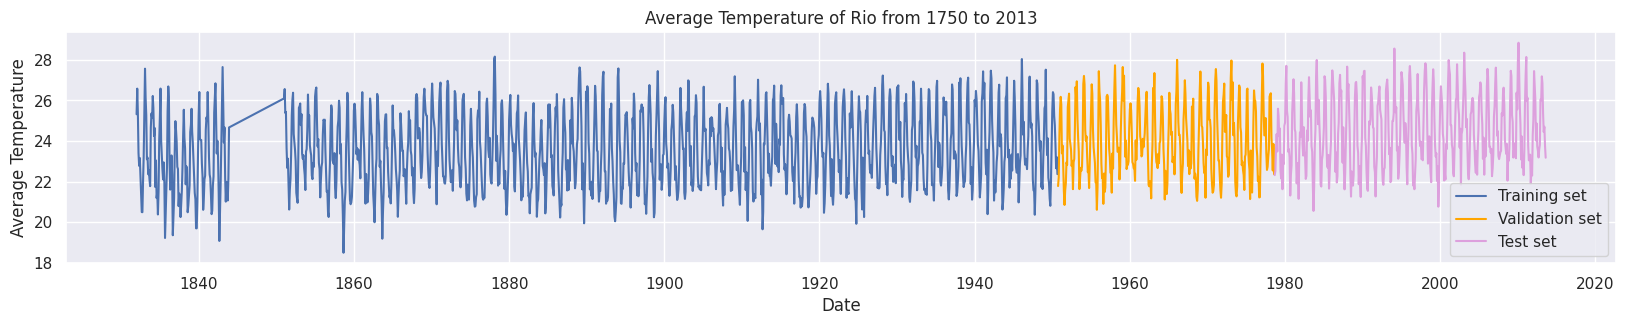

In [ ]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

plt.rcParams["figure.dpi"]=100
plt.rcParams['savefig.dpi']=300

plt.figure(figsize=(20,3))
fig = plt.figure(1)
ax = fig.add_subplot(111) # 111: No. of rows, cols, index
ax.set_xlabel("Date")
ax.set_ylabel("Average Temperature")
ax.plot(train_set, label="Training set")
ax.plot(val_set, label="Validation set", c="orange")
ax.plot(test_set, label="Test set", c="plum")
ax.legend()
plt.title("Average Temperature of Rio De Janeiro from 1750 to 2013")
# plt.savefig("./global_temp_shanghai.jpg", bbox_inches='tight') # save figure

## Train Non-linear Autoregressive Model
Now, we start to train a non-linear autoregressive (NAR) model on the training set and choosing the hyper-parameters on the validation set.

If you choose support vector regressor as the regression model, then in addtion to tune on ``lags``, you need to tune on ``kernel``, ``gamma``, etc.
If you choose random forest, you mainly need to tune on ``lags``.
You can also choose other machine learning regression method for the autoregressive model.

After deciding the hyper-parameters, you can predict the results on the test set.

We will utilize package ``skforecast`` for implementation.

In [ ]:
# Modeling and Forecasting
# First import the necessary sklearn regression method
from sklearn.neural_network import MLPRegressor # we use neural network as regressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# We import the prediction functions from skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Initialize the forecaster
forecaster = ForecasterAutoreg(
    # regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500), # you can tune the hidden dimension and other hyper-parameters here
    regressor=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),  # Tune these hyper-parameters
    # regressor=RandomForestRegressor(n_estimators=50, max_depth=16, random_state=32),  # Tune these hyper-parameters
    # regressor=SVR(kernel='rbf', C=0.4, epsilon=0.2, gamma='scale'),  # Tune these hyper-parameter
    lags=12  # Tune the number of lags
)


# fit model on the training set
forecaster.fit(y=train_set)
# print the NAR model
forecaster

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=10, random_state=42) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12] 
Transformer for y: None 
Transformer for exog: None 
Window size: 12 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 1340] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2024-01-03 21:31:17 
Last fit date: 2024-01-03 21:31:18 
Skforecast version: 0.11.0 
Python version: 3.10.12 
Forecaster id: None

After fitting/training the model on the training set, we evaluate the results on the validation set.

In [ ]:
steps = len(val_set)
predictions = forecaster.predict(steps=steps)
predictions.head(5)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


12    21.751377
13    22.522995
14    23.648942
15    25.284395
16    25.987001
Name: pred, dtype: float64

In [ ]:
# compute the root mean squared error between the predictions and validation set
mse = mean_squared_error(val_set, predictions)
print("The MSE on the validation set is: {:.3f}".format(mse))

The MSE on the validation set is: 0.764


We now visualize the prediction results and the ground-truth validation data.

Text(0.5, 1.0, 'Prediction results on validation of Rio De Janeiro dataset')

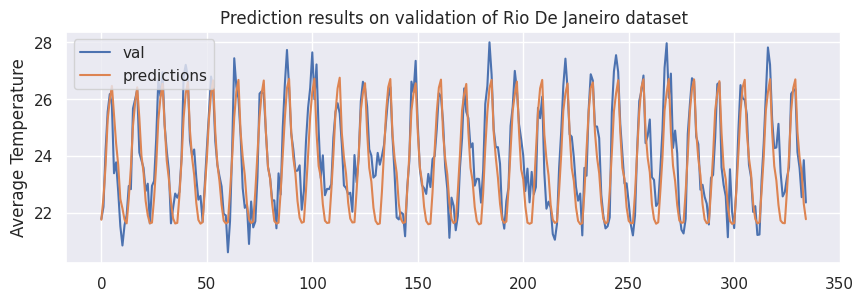

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(val_set.to_numpy(), label='val')
ax.plot(predictions.to_numpy(), label='predictions')
ax.legend()
ax.set_ylabel("Average Temperature")
plt.title("Prediction results on validation of Rio De Janeiro dataset")

## Tune the hyper-parameter ``lags``
We first try a large range of lags as follows:

In [ ]:
lag_list = np.arange(2,50,2)
mse_list = []
# Try Random Forrests and gradient boosting
for i in range(len(lag_list)):
    # Set regressor
    forecaster = ForecasterAutoreg(
        # regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500), # you can tune the hidden dimension and other hyper-parameters here
        regressor=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),  # Tune these hyper-parameters
        # regressor=SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale'),  # Tune these hyper-parameters
        # regressor=SVR(kernel='rbf', C=0.4, epsilon=0.2, gamma='scale'),  # Tune these hyper-parameter
        lags = int(lag_list[i]) # you can try different lags here
    )

    # Trainig on training set
    forecaster.fit(y=train_set)

    # Evaluate model on validation set
    steps = len(val_set)
    predictions = forecaster.predict(steps=steps)

    # Compute MSE between predictions and ground-truth data

    mse = mean_squared_error(val_set, predictions)
    mse_list.append(mse)
    print("The MSE on the validation set is: {:.3f}".format(mse))

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 4.848


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 6.370


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 6.014


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 1.608


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 1.504


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.764


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.756


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.727


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.752


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 1.627


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.788


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.708


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.724


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.717


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.703


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.783


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.763


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.774


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.688


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.716


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.759


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.677


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.690


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.669


([<matplotlib.axis.XTick at 0x7d9a8f0c7b20>,
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '10'),
  Text(5, 0, '12'),
  Text(6, 0, '14'),
  Text(7, 0, '16'),
  Text(8, 0, '18'),
  Text(9, 0, '20'),
  Text(10, 0, '22'),
  Text(11, 0, '24'),
  Text(12, 0, '26'),
  Text(13, 0, '28'),
  Text(14, 0, '30'),
  Text(15, 0, '32'),
  Text(16, 0, '34'),
  Text(17, 0, '36'),
  Text(18, 0, '38'),
  Text(19, 0, '40'),
  Text(20, 0, '42'),
  Text(21, 0, '44'),
  Text(22, 0, '46'),
  Text(23, 0, '48')])

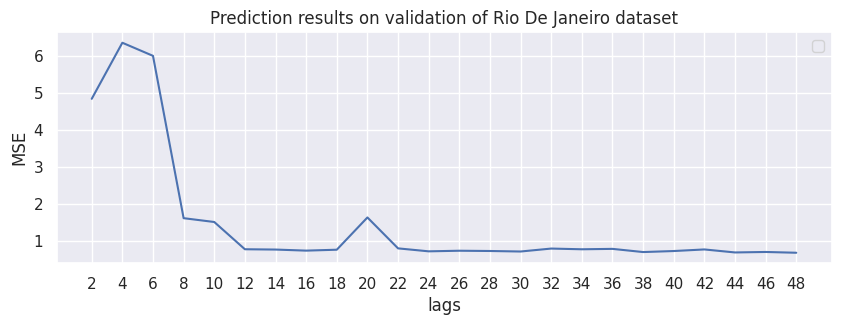

In [ ]:
# Plot the MSE_list curve to select the best lags
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(mse_list)
ax.legend()
ax.set_xlabel("lags")
ax.set_ylabel("MSE")
plt.title("Prediction results on validation of Rio De Janeiro dataset")
plt.xticks(np.arange(len(lag_list)),np.arange(2,50,2))

We now try a smaller range of lags that gives the lowest MSE.

In [ ]:
# We change to a smaller range of lags
lag_list = np.arange(24,34,1)
mse_list = []
for i in range(len(lag_list)):
    # Set regressor
    forecaster = ForecasterAutoreg(
        # regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500, solver="sgd"),
        regressor=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),  # Tune these hyper-parameters
        # regressor=SVR(kernel='rbf', C=0.4, epsilon=0.2, gamma='scale'),  # Tune these hyper-parameter
        lags = int(lag_list[i]) # you can try different lags here
    )

    # Trainig on training set
    forecaster.fit(y=train_set)

    # Evaluate model on validation set
    steps = len(val_set)
    predictions = forecaster.predict(steps=steps)

    # Compute MSE between predictions and ground-truth data

    mse = mean_squared_error(val_set, predictions)
    mse_list.append(mse)
    print("The MSE on the validation set is: {:.3f}".format(mse))

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.708


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.721


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.724


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.715


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.717


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.689


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.703


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.777


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.783


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 0.721


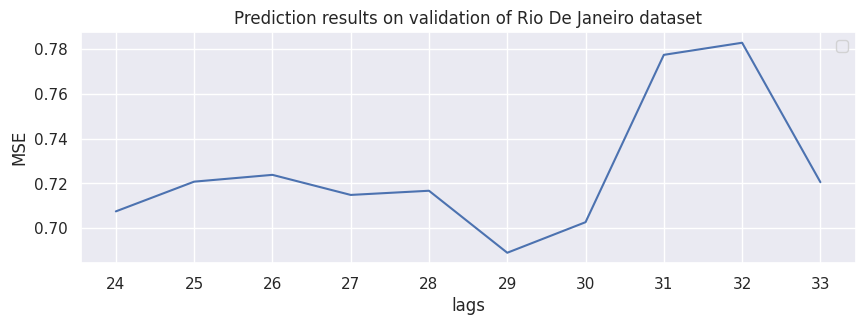

In [ ]:
# Plot the MSE_list curve to select the best lags
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(mse_list)
ax.legend()
ax.set_xlabel("lags")
ax.set_ylabel("MSE")
plt.title("Prediction results on validation of Rio De Janeiro dataset")
plt.xticks(np.arange(10),np.arange(24,34,1));

In [ ]:
# Seems that lag=5 gives good prediction results
# Hence, we try lag=5
forecaster = ForecasterAutoreg(
        # regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500, solver="sgd"),
        regressor=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),  # Tune these hyper-parameters
        # regressor=SVR(kernel='rbf', C=0.4, epsilon=0.2, gamma='scale'),  # Tune these hyper-parameter
        lags = 29
    )

# Trainig on training set
forecaster.fit(y=train_set)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


In [ ]:
# Evaluate model on test set
steps = len(val_set) + len(test_set)
predictions = forecaster.predict(steps=steps)[len(val_set):]

# Compute MSE between predictions and ground-truth data
mse = mean_squared_error(test_set, predictions)
print("The MSE of prediction results on the test set is: {:.3f}\n".format(mse))

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE of prediction results on the test set is: 1.158



Text(0.5, 1.0, 'Prediction results on test set of Rio De Janeiro dataset (lag=29)')

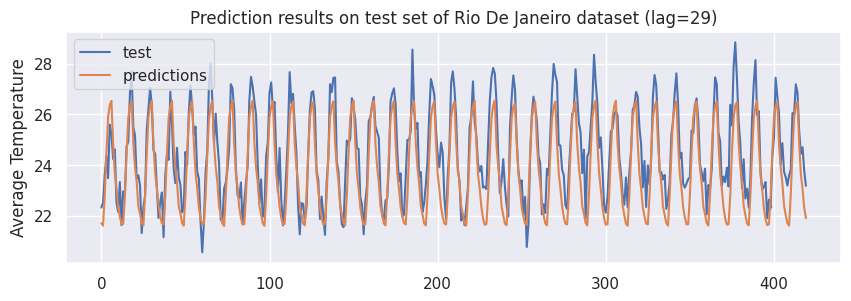

In [ ]:
# Plot the prediction results on the test set
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(test_set.to_numpy(), label='test')
ax.plot(predictions.to_numpy(), label='predictions')
ax.legend()
ax.set_ylabel("Average Temperature")
plt.title("Prediction results on test set of Rio De Janeiro dataset (lag=29)")